# Exploratory data analysis (EDA) : Iris Dataset

## Description of dataset

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#Load Iris.csv into a pandas dataFrame.

iris = pd.read_csv("/Users/satyamgovila/Desktop/iris.csv")


In [25]:
#Dimensions of the dataset
print (iris.shape)

(150, 6)


In [26]:
#Column names in the dataset
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'Unnamed: 5'],
      dtype='object')


In [27]:
#Number of datapoints in each class or Number of flowers in each species
iris["species"].value_counts()


versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

## 2-D Scatter Plot

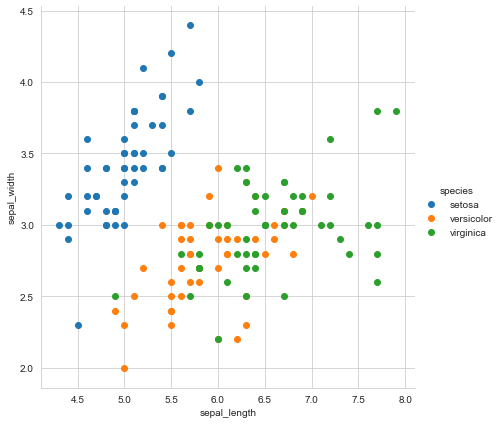

In [31]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height=6) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

Observation(s):

(1.)Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.

(2.)Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## Pair-Plot

ZeroDivisionError: 0.0 cannot be raised to a negative power

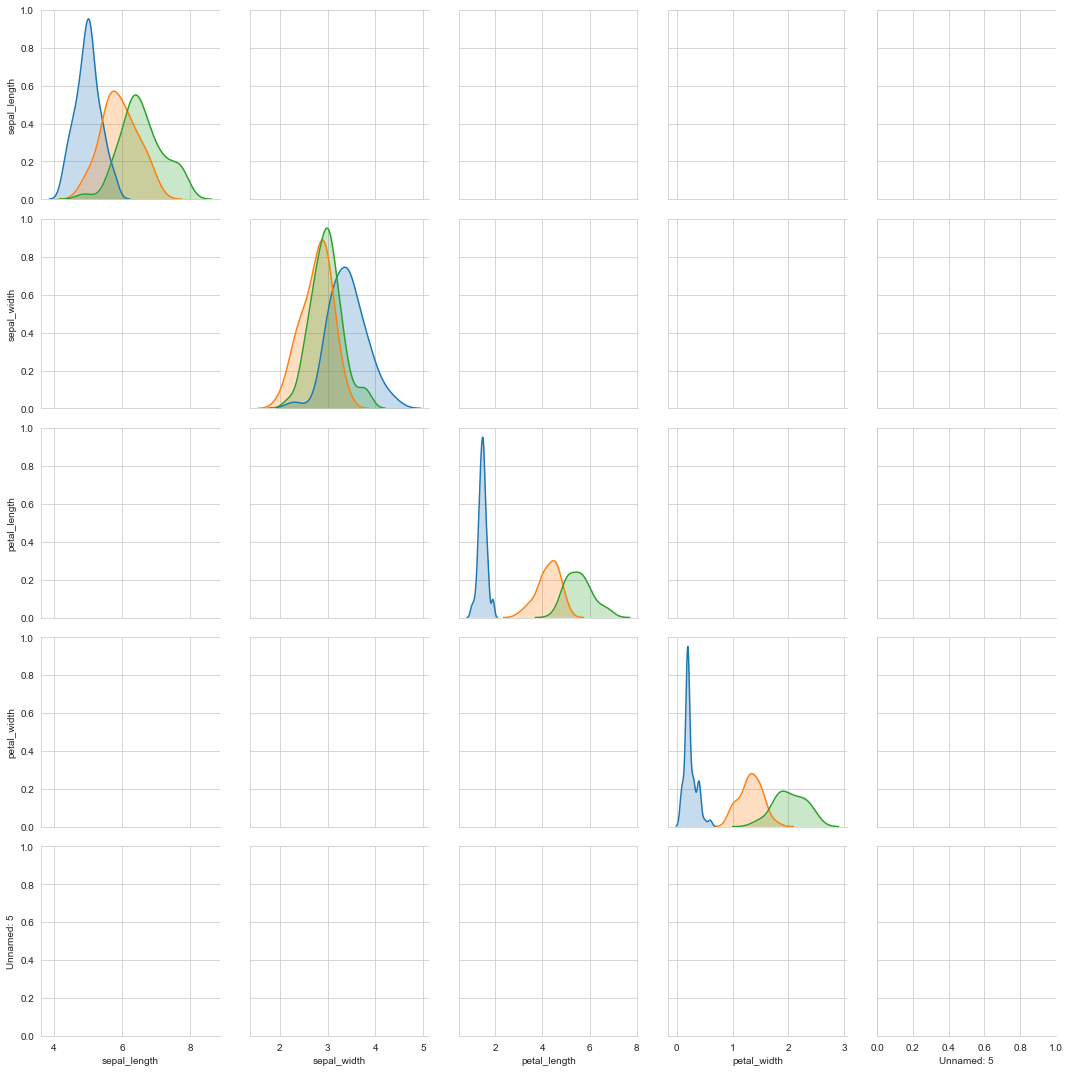

In [35]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.show()

Observations

(1.)petal_length and petal_width are the most useful features to identify various flower types.

(2.)While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

(3.)We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

### 1-D Scatter Plot

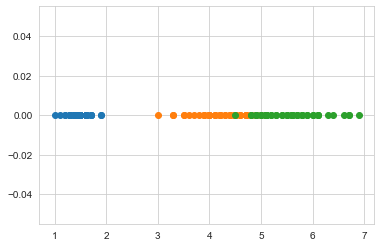

In [37]:
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()


Disadvantages of 1-D scatter plot: 

Very hard to make sense of points from different species as the points overlap a lot 
and therefore no valuable information can be derived from it.


### Histogram, PDF, CDF

Different plots of probability distribution:-

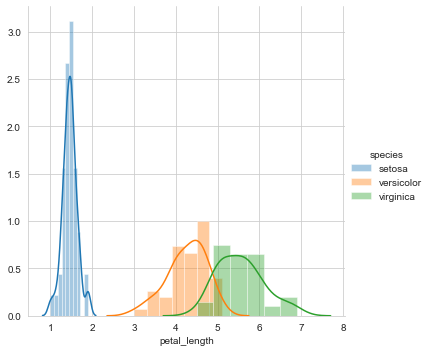

In [40]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show()

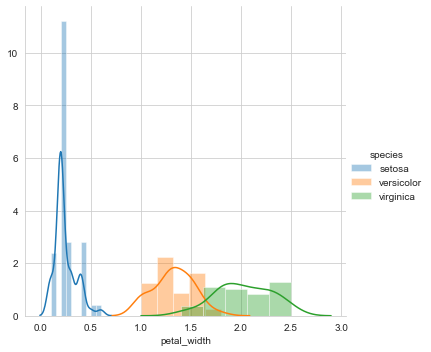

In [41]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show()

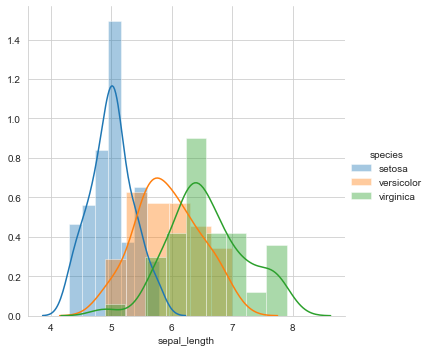

In [42]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show()

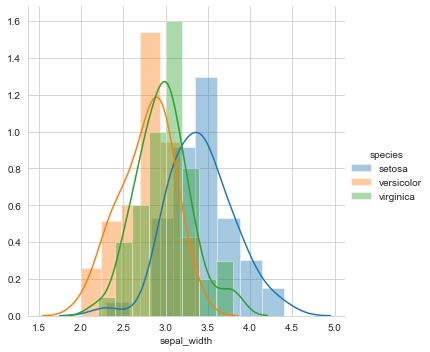

In [43]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show()

From the above probability distributions,the most valuable information can be derived from petal-length as the species are fairly far from each other and can be segregated using if-else conditions using appropriate threshold values

#### Cumulative Distribution Function (CDF)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


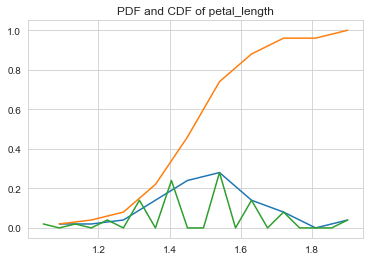

In [46]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title('PDF and CDF of petal_length')
plt.show()

Note:-

CDF value at any point gives the percentage of datapoints that have value less than that given point

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


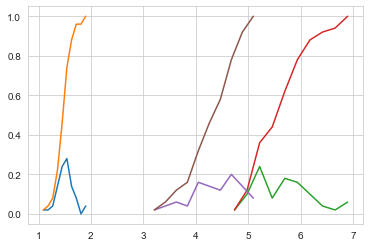

In [47]:
# Plots of CDF of petal_length for various types of flowers.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

#### Mean,Variance and Standard Deviation


In [52]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
print("******")

print("Mean with an outlier:")
print(np.mean(np.append(iris_setosa["petal_length"],50)))
print("******")
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))


Means:
1.464
******
Mean with an outlier:
2.4156862745098038
******
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


#### Median, Percentile, Quantile, IQR, Median About Deviation


In [53]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


### Box Plot and Whiskers


It is a method with box-plot and whiskers which helps in visualizing 1-D Scatter plot more intuitively.It is based on the concept of median, percentile , quantile.Box-plot can be visualized as a PDF on the side-ways.


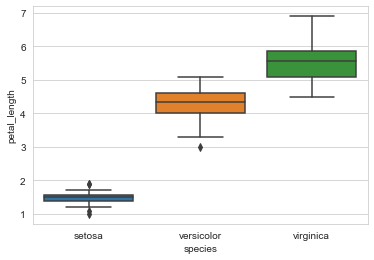

In [56]:
sns.boxplot(x='species',y='petal_length', data=iris )
plt.show()

### Violin Plot


A violin plot combines the benefits of the previous two plots and simplifies them

Denser regions of the data are fatter, and sparser ones thinner in a violin plot


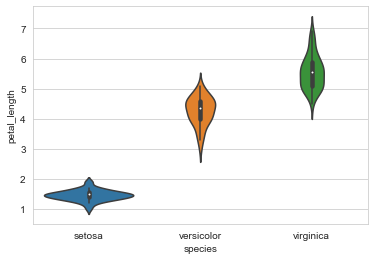

In [58]:
sns.violinplot(x="species", y="petal_length", data=iris, size=12)
plt.show()